In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import plotly.express as px
import plotly.graph_objects as go

In [16]:
def create_kto_data(yy, mm):
    # 엑셀파일 경로 설정
    path = f'../../data/dataset/tourists/kto_{yy}{mm}.xlsx'
    
    df = pd.read_excel(path, skiprows=1, skipfooter=4, usecols=['국적', '관광', '상용', '공용', '유학/연수', '기타', '계'])
    # 기준년월 컬럼추가
    df['기준년월'] = f'{yy}-{mm}'
    # 아래 데이터 삭제
    df_country = df[~df['국적'].isin(['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'])]
    # 인덱스 재지정
    df_country = df_country.reset_index().drop(columns='index')
    # 대륙 컬럼 생성
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    # 관광객 비율 컬럼 생성
    df_country['관광객비율(%)'] = round(df_country['관광'] / df_country['계'] * 100, 1)
    # 관광객 전체 비율 컬럼 생성
    df_country['전체비율(%)'] = round(df_country['관광'] / sum(df_country['관광']) * 100, 1)
    
    return df_country

In [17]:
# 함수 테스트

kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [13]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        str_mm = str(mm).zfill(2) # 0 을 포함하여 2 자리로 출력 ( 01, 02 ... )
        yymm = '{}{}'.format(yy,str_mm)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [19]:
df = pd.DataFrame()

for yy in range(2010, 2021):
    for mm in range(1, 13):
        
        try:
            str_mm = str(mm).zfill(2)
            temp_df = create_kto_data(str(yy), str_mm)
            
            df = pd.concat([df, temp_df], ignore_index=True)
        except: # 202006 ~ 202012 데이터 X 에러 발생
            pass

In [20]:
df.shape

(7500, 11)

#### 전체 정보를 엑셀파일로 저장

In [21]:
df.to_excel("../../data/dataset/tourists/kto_total.xlsx", index=False)

#### 기준년월 데이터 타입 변경 ( datetime )

In [23]:
df['기준년월'] = pd.to_datetime(df['기준년월'])

#### 년도, 월 컬럼 생성

In [24]:
df['년도'] = df['기준년월'].dt.year

In [25]:
df['월'] = df['기준년월'].dt.month

In [26]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01-01,아시아,97.0,50.6,2010,1
1,대만,35788,41,17,37,516,36399,2010-01-01,아시아,98.3,8.9,2010,1
2,홍콩,13874,55,0,21,595,14545,2010-01-01,아시아,95.4,3.5,2010,1
3,마카오,554,0,0,0,0,554,2010-01-01,아시아,100.0,0.1,2010,1
4,태국,13374,39,13,53,4335,17814,2010-01-01,아시아,75.1,3.3,2010,1


#### 중국데이터

In [27]:
df_filter = df.query('국적 == "중국"')

In [28]:
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01-01,아시아,44.3,10.1,2010,1
77,중국,60590,7907,68,29546,42460,140571,2010-02-01,아시아,43.1,13.6,2010,2
137,중국,50330,13549,174,14924,62480,141457,2010-03-01,아시아,35.6,9.2,2010,3
197,중국,84252,13306,212,2199,47711,147680,2010-04-01,아시아,57.1,15.5,2010,4
257,중국,89056,12325,360,2931,49394,154066,2010-05-01,아시아,57.8,17.0,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01-01,아시아,81.7,38.2,2020,1
7277,중국,49520,715,11,20753,33087,104086,2020-02-01,아시아,47.6,9.8,2020,2
7337,중국,5040,115,2,7388,4050,16595,2020-03-01,아시아,30.4,16.0,2020,3
7397,중국,522,71,0,1112,2230,3935,2020-04-01,아시아,13.3,10.2,2020,4


In [29]:
file_path = "../../data/dataset/tourists/[국적별 관광객 데이터] 중국.xlsx"
df_filter.to_excel(file_path, index=False)

#### 국적별로 위 작업을 모두 실행 ?

In [33]:
for con in df['국적'].unique():
    df_filter = df.query(f'국적 == "{con}"')
    file_path = f"../../data/dataset/tourists/[국적별 관광객 데이터] {con}.xlsx"
    df_filter.to_excel(file_path, index=False)

#### 중국 관광객 시각화

In [37]:
# 중국, 컬럼(관광, 기준년월)

df_china = df.query('국적 == "중국"')[['관광', '기준년월']]
df_china

,관광,기준년월
17,40425,2010-01-01
77,60590,2010-02-01
137,50330,2010-03-01
197,84252,2010-04-01
257,89056,2010-05-01
...,...,...
7217,393336,2020-01-01
7277,49520,2020-02-01
7337,5040,2020-03-01
7397,522,2020-04-01


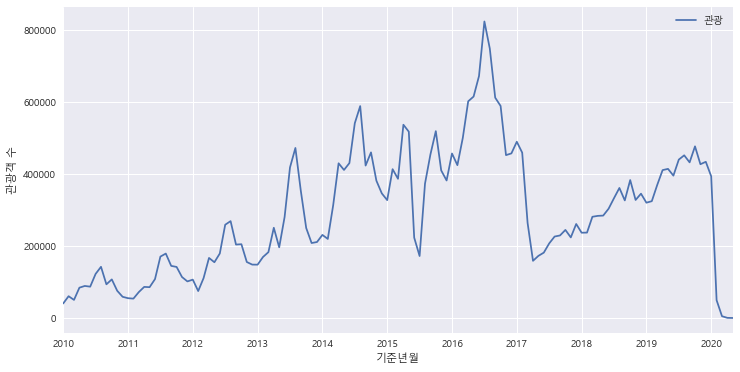

In [38]:
df_china.plot(x='기준년월', y='관광', figsize=(12,6), ylabel='관광객 수');

- 2010 ~ 2016 년 관광객 수 꾸준히 증가
- 2015 년 여름 관광객 수 급감 ( MERS 유행으로 인한 감소세 )
- 2017 관광객 수 급감 ( SAD 배치로 인한 이슈 발생 )
- 2020 관광객 수 급감 ( Covid19 유행으로 인한 감소세 )

#### 국적별 관광객 상위 5개국

In [49]:
top5 = df.groupby('국적')[['관광']].sum().sort_values('관광', ascending=False).head(5)
top5

,관광
국적,
중국,36091652
일본,27011467
대만,7222786
미국,6112950
홍콩,5005868


In [57]:
top5_country = df.loc[df['국적'].isin(top5.index)]
top5_country

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01-01,아시아,97.0,50.6,2010,1
1,대만,35788,41,17,37,516,36399,2010-01-01,아시아,98.3,8.9,2010,1
2,홍콩,13874,55,0,21,595,14545,2010-01-01,아시아,95.4,3.5,2010,1
17,중국,40425,11930,55,2751,36091,91252,2010-01-01,아시아,44.3,10.1,2010,1
25,미국,26943,1195,2145,135,12647,43065,2010-01-01,아메리카,62.6,6.7,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7440,일본,45,105,3,41,219,413,2020-05-01,아시아,10.9,0.7,2020,5
7441,대만,31,8,3,33,114,189,2020-05-01,아시아,16.4,0.5,2020,5
7442,홍콩,6,5,0,2,11,24,2020-05-01,아시아,25.0,0.1,2020,5
7457,중국,179,70,2,1189,3684,5124,2020-05-01,아시아,3.5,2.9,2020,5


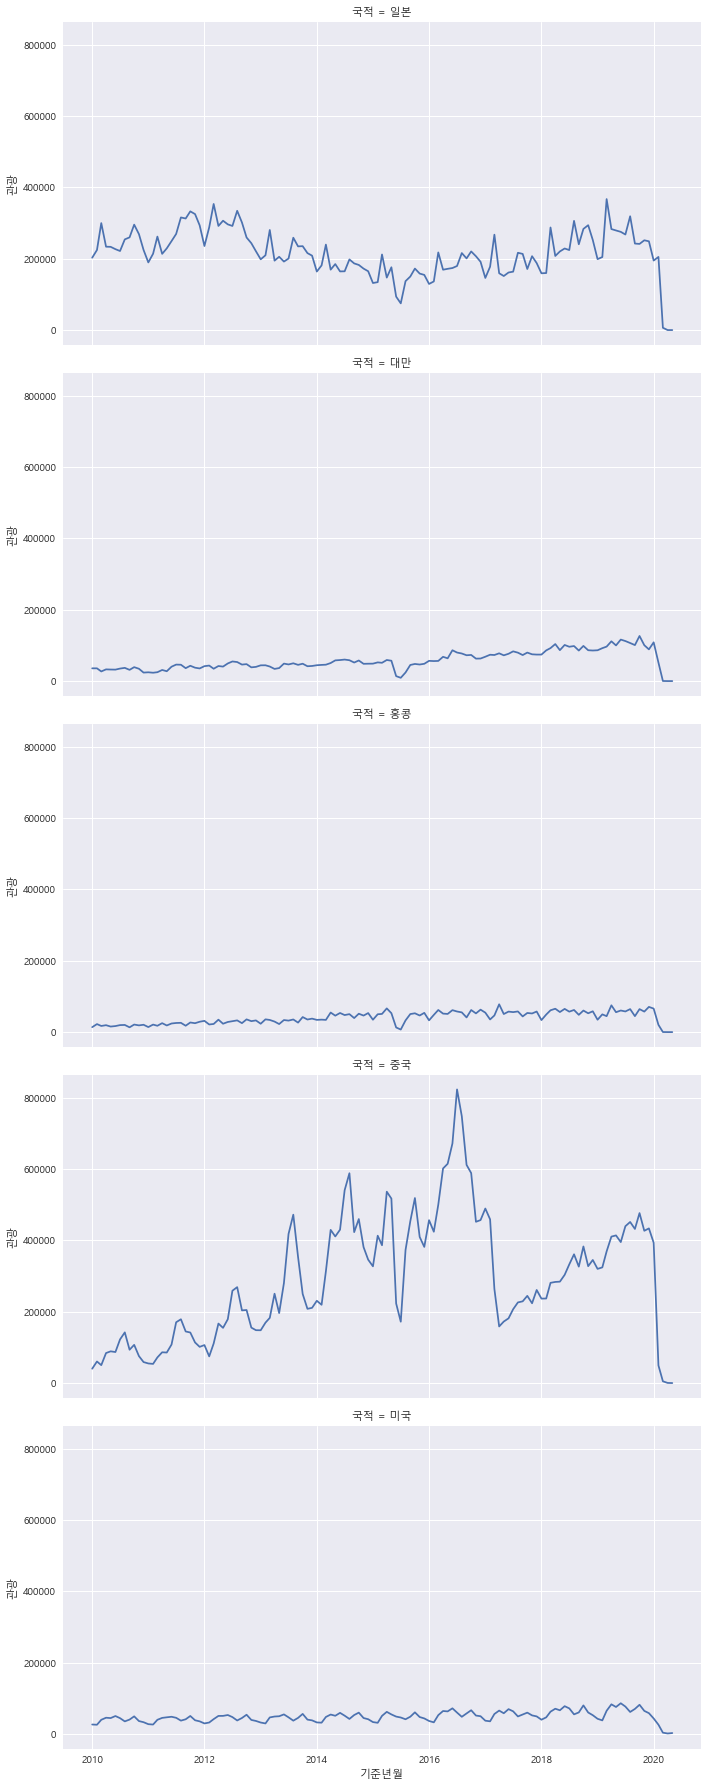

In [58]:
sns.relplot(data=top5_country, x='기준년월', y='관광', col='국적', kind='line', col_wrap=1, aspect=2);

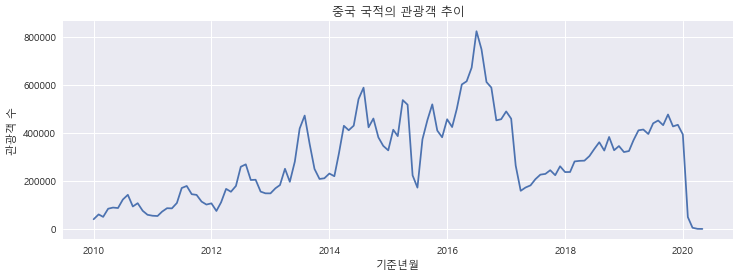

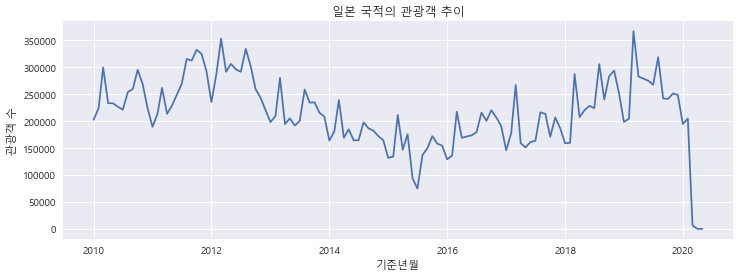

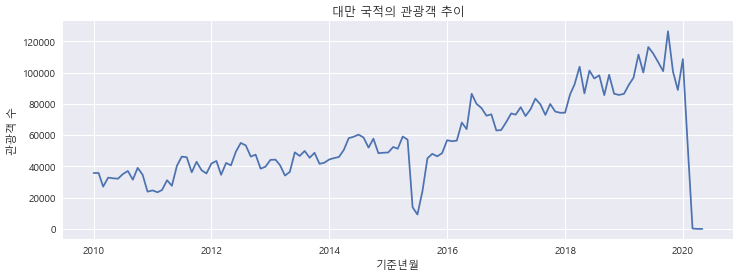

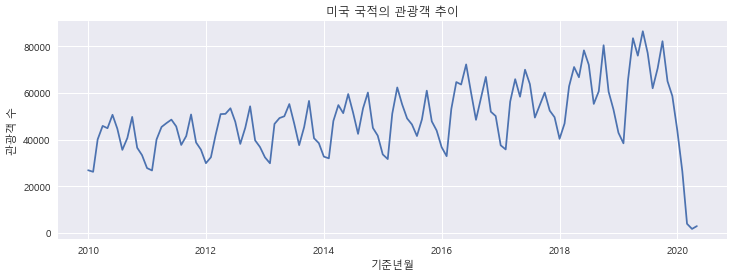

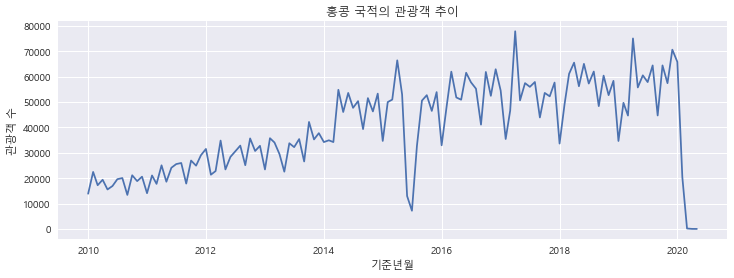

In [59]:
for cntry in top5.index:
    # 상위 5개국 데이터 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    plt.figure(figsize=(12,4))
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    plt.title(f"{cntry} 국적의 관광객 추이")
    plt.xlabel("기준년월")
    plt.ylabel("관광객 수")

#### HeatMap 시각화

In [61]:
df_china = df.loc[df['국적'] == '중국']

In [66]:
china_pivot = df_china.pivot(index='년도', columns='월', values='관광')

Text(0.5, 1.0, '년도별 중국 관광객')

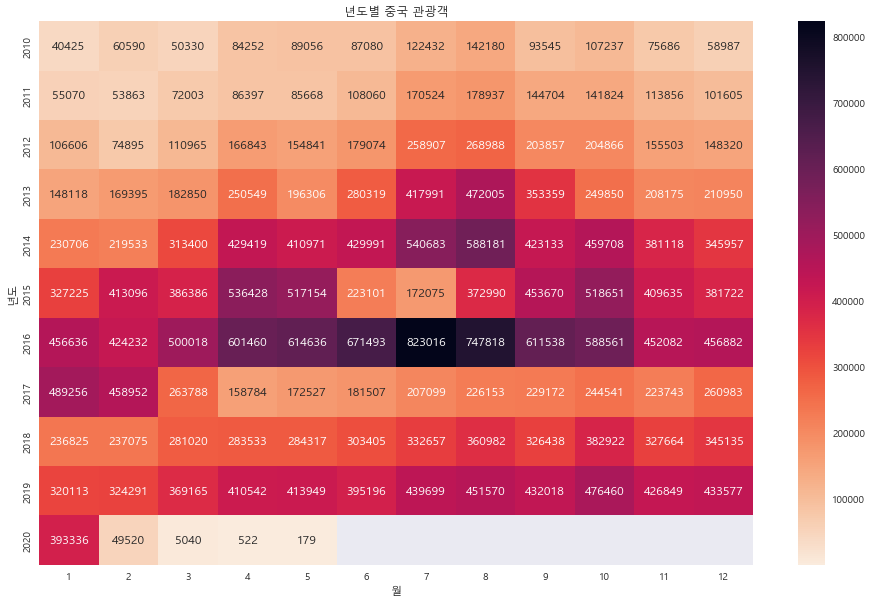

In [70]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=china_pivot, annot=True, fmt=".0f", cmap='rocket_r')
plt.title('년도별 중국 관광객')

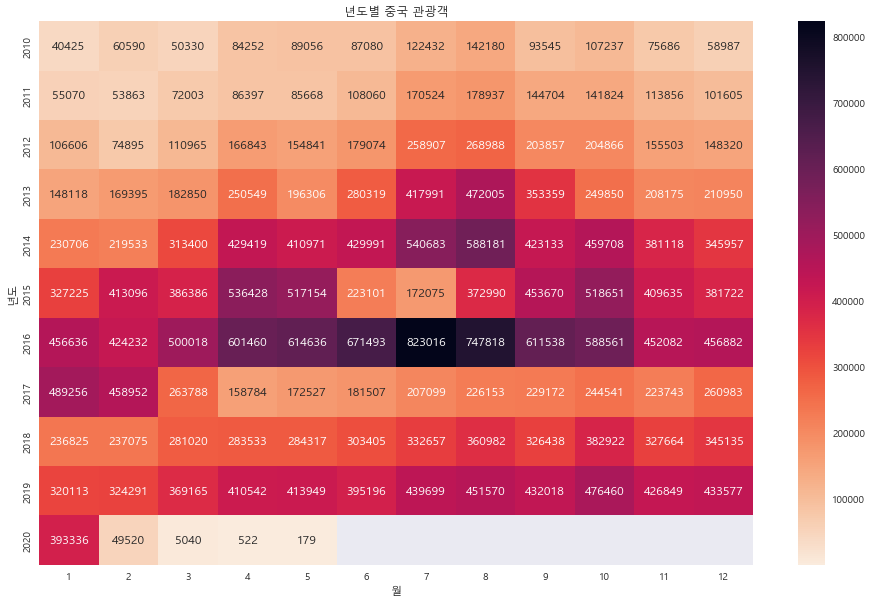

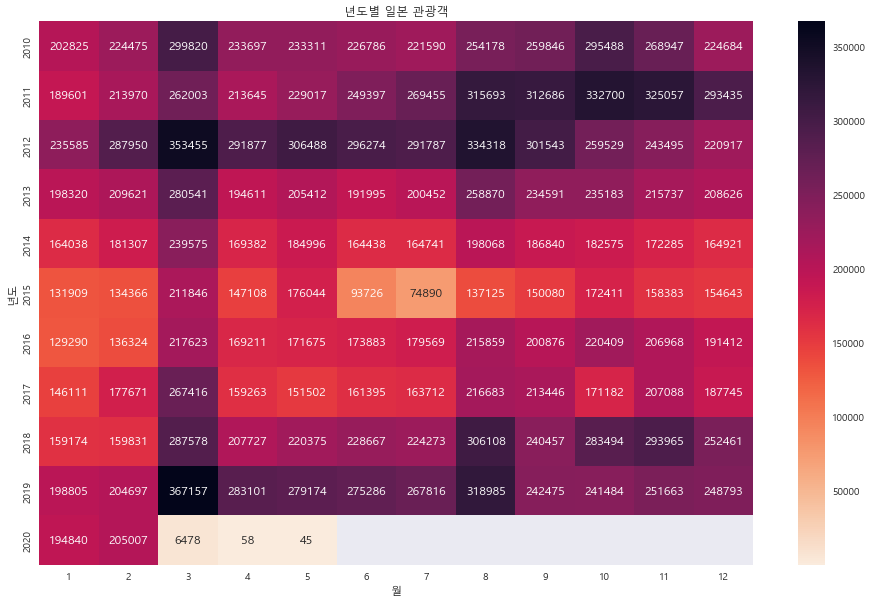

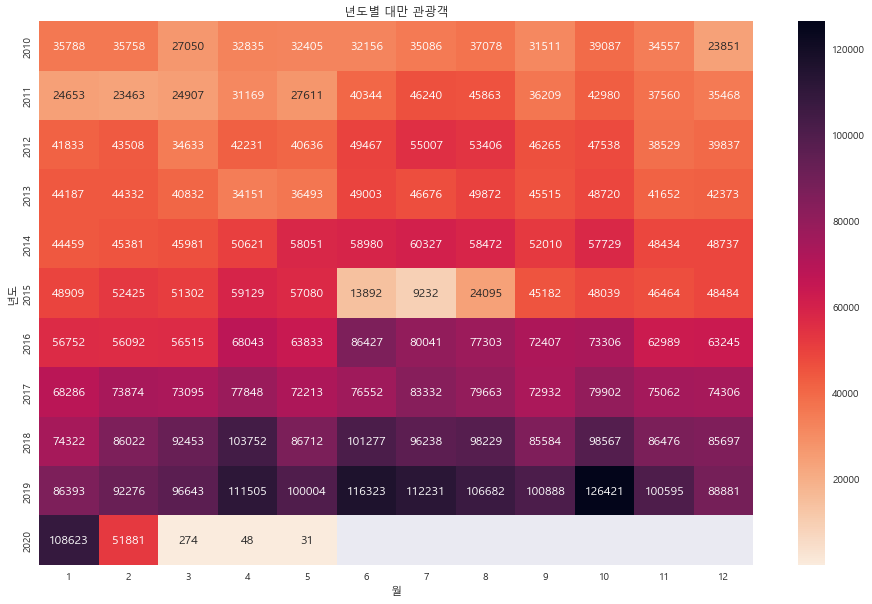

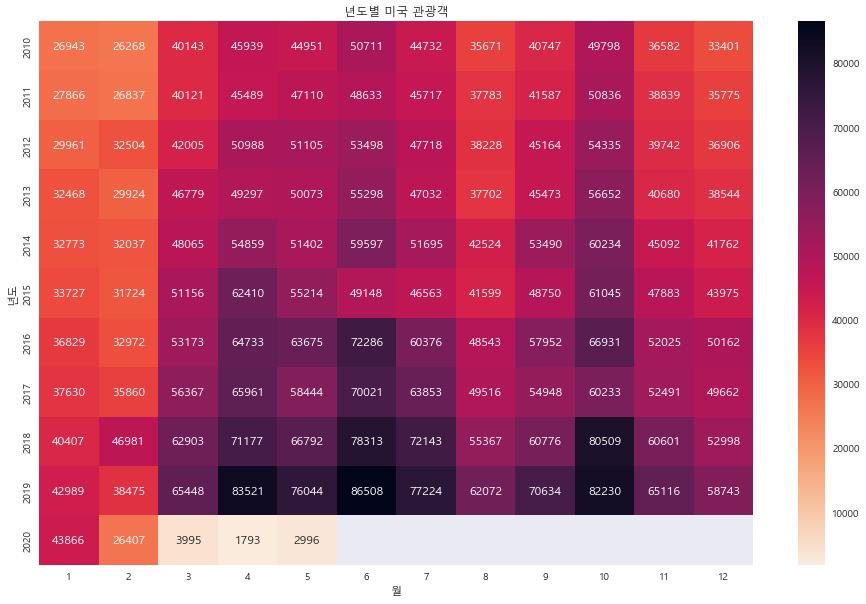

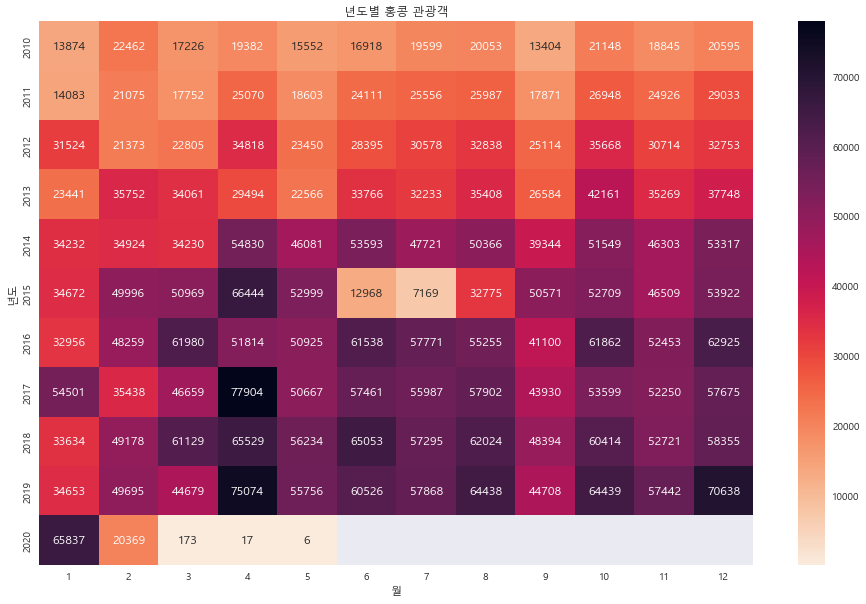

In [72]:
for contry in top5.index:
    condition = (df['국적'] == contry)
    df_filter = df[condition]
    
    plt.figure(figsize=(16, 10))
    df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월')
    
    sns.heatmap(data=df_pivot, annot=True, fmt=".0f", cmap='rocket_r')
    plt.title(f'년도별 {contry} 관광객')